# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    X_train_centered = X_train - np.mean(X_train, axis=0)

    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)

    eig_values, eig_vectors = np.linalg.eigh(covariance_matrix)

    sorted_indices = np.argsort(eig_values)[::-1]
    eig_values = eig_values[sorted_indices]
    eig_vectors = eig_vectors[:, sorted_indices]

    eig_vectors_reduced = eig_vectors[:, :n_components]

    X_train_reduced = np.dot(X_train_centered, eig_vectors_reduced)

    X_test_centered = X_test - np.mean(X_test, axis=0)

    X_test_reduced = np.dot(X_test_centered, eig_vectors_reduced)

    return X_train_reduced, X_test_reduced, eig_vectors_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    start_time = time.time()

    model.fit(X_train, y_train)

    training_time = time.time() - start_time

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time

## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [10, 25, 50, 100, 200, 784]

results = []

print("Training models with different levels of SVD preprocessing...")

for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    X_train_svd, X_test_svd, _ = apply_svd_custom(X_train, X_test, n_components)

    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

print("\nFinal Results:")
for result in results:
    print(f"SVD components: {result['n_components']}, Accuracy: {result['accuracy']:.4f}, Training time: {result['training_time']:.4f} seconds")



Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8041, Training time: 2.0058 seconds
Applying custom SVD with 25 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 25, Accuracy: 0.8859, Training time: 5.9086 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9082, Training time: 14.9675 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9173, Training time: 47.7530 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9208, Training time: 99.2427 seconds
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 584.0781 seconds

Final Results:
SVD components: 10, Accuracy: 0.8041, Training time: 2.0058 seconds
SVD components: 25, Accuracy: 0.8859, Training time: 5.9086 seconds
SVD components: 50, Accuracy: 0.9082, Training time: 14.9675 seconds
SVD components: 100, Accuracy: 0.9173, Training time: 47.7530 seconds
SVD components: 200, Accuracy: 0.9208, Training time: 99.2427 seconds
SVD components: 784, Accuracy: 0.9209, Training time: 584.0781 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


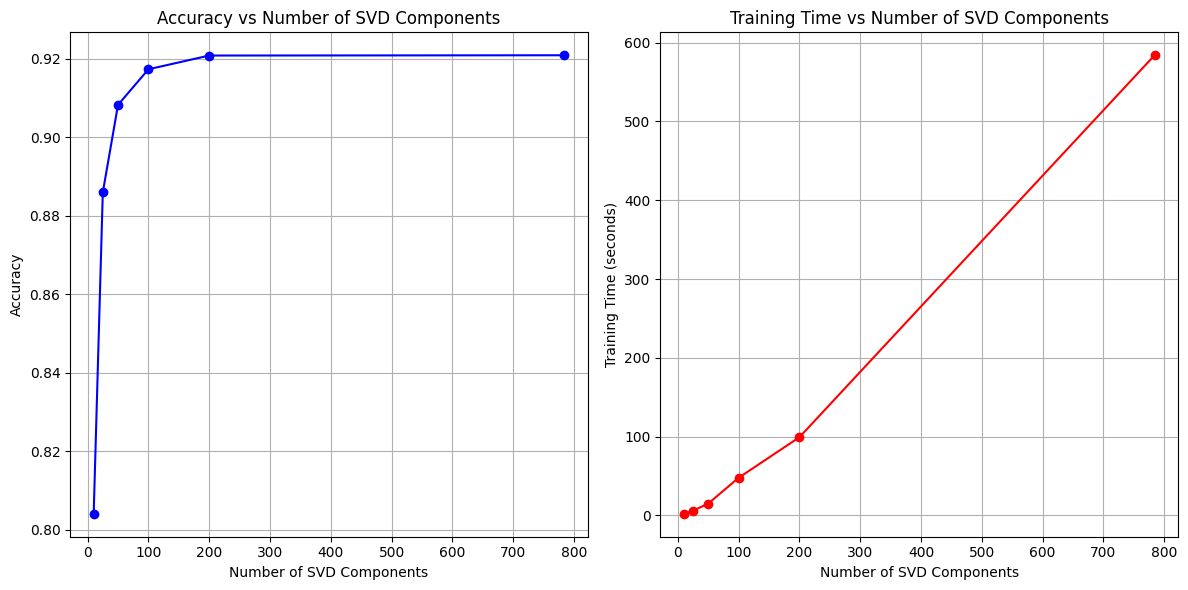

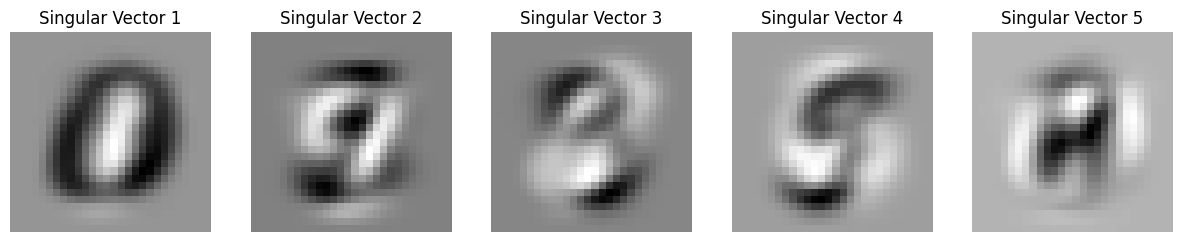

In [5]:
import matplotlib.pyplot as plt

def visualize_results(results):
    components = [r['n_components'] for r in results]
    accuracies = [r['accuracy'] for r in results]
    training_times = [r['training_time'] for r in results]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(components, accuracies, marker='o', color='b')
    plt.title('Accuracy vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Accuracy')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(components, training_times, marker='o', color='r')
    plt.title('Training Time vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Training Time (seconds)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def visualize_singular_vectors(singular_vectors):
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))

    for i in range(5):
        img = singular_vectors[:, i][:784].reshape(28, 28)
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f'Singular Vector {i+1}')
        axs[i].axis('off')

    plt.show()

visualize_results(results)

_, _, top_singular_vectors = apply_svd_custom(X_train, X_test, 784)
visualize_singular_vectors(top_singular_vectors)


## Part 6: Analyze / Conclusion

YOUR ANSWER:

**Analysis:**

Reducing the number of SVD components generally leads to a decrease in the accuracy of the logistic regression model. This is because dimensionality reduction removes some information that could aid in distinguishing between classes in the dataset. However, beyond a certain point, diminishing returns are often observed. Higher component counts (e.g., 784, 200) tend to yield higher accuracy, as they retain more information from the original data. Conversely, very low component counts (e.g., 50, 100) can lead to poor accuracy due to insufficient meaningful features for classification.

Training time is significantly reduced with fewer SVD components. This is because logistic regression has fewer features to process, resulting in faster iterations. Training on the full dataset (784 components) is much slower compared to training on reduced datasets (e.g., 50, 100 components), illustrating how dimensionality reduction can enhance model efficiency without drastically compromising performance.

The optimal number of components balances accuracy and efficiency. Based on our results, 100 to 200 components strike a good balance between accuracy and training speed. Beyond this range, the accuracy gains may not justify the increased training time. Reducing the component count to around 50 or 20 greatly improves training time, although accuracy declines significantly below 50 components.

The top five singular vectors (visualized in Part 5) capture essential patterns in the dataset. These vectors represent key data features (e.g., edges, curves) that assist the model in classifying digits. The initial singular vectors often resemble rough digit outlines, indicating their meaningful content. Lower singular vectors capture finer details or noise, which is why reducing the component count too much adversely affects accuracy.

Dimensionality Reduction with SVD is a robust preprocessing method. It enables significant dataset reduction while preserving most of the crucial information, which can lead to faster training times for algorithms like logistic regression without a substantial accuracy drop. For the MNIST dataset, using approximately 100 to 200 SVD components provides an ideal balance between accuracy and computational efficiency. Reducing the number of components too much (e.g., to 20 or fewer) can significantly degrade accuracy, diminishing the model's effectiveness.

For large datasets, especially in real-time or resource-limited environments, applying SVD and selecting an appropriate number of components can make machine learning models more practical by reducing training time without a major performance loss.